In [7]:
from sklearn.datasets import load_iris
iris=load_iris()
X=iris.data
y=iris.target
y_name=iris.target_names


In [10]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

logreg.fit(X,y)
y_pred=logreg.predict(X)
print("predicted response:\n"+str(y_pred))
print("row response:\n"+str(y))

predicted response:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
row response:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [11]:
len(y_pred)

150

In [12]:
from sklearn import metrics
print(metrics.accuracy_score(y,y_pred))

0.96


In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn5=KNeighborsClassifier(n_neighbors=5)
knn5.fit(X,y)
y_pred_=knn5.predict(X)
print(metrics.accuracy_score(y,y_pred_))

0.966666666667


In [14]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)
print(X_train.shape,X_test.shape)

(120, 4) (30, 4)


In [16]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
logreg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
y_pre__=logreg.predict(X_test)
print(metrics.accuracy_score(y_test,y_pre__))

0.933333333333


In [19]:
knn5=KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train,y_train)
y_pred___=knn5.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred___))


0.966666666667


In [26]:
k_range=range(1,26)
test_accuracy=[]
for  k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred___=knn.predict(X_test)
    test_accuracy.append(metrics.accuracy_score(y_test,y_pred___))
    print(metrics.accuracy_score(y_test,y_pred___))

0.933333333333
0.933333333333
0.966666666667
0.966666666667
0.966666666667
0.966666666667
0.966666666667
0.966666666667
0.966666666667
0.966666666667
0.966666666667
0.966666666667
0.966666666667
0.966666666667
0.966666666667
0.966666666667
0.966666666667
0.966666666667
0.966666666667
0.933333333333
0.966666666667
0.933333333333
0.966666666667
0.966666666667
0.966666666667


Text(0,0.5,'Testing Accuracy')

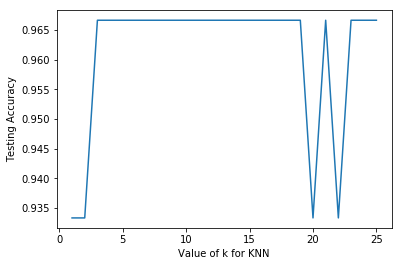

In [27]:
%matplotlib inline
import matplotlib.pylab as plt
plt.plot(k_range,test_accuracy)
plt.xlabel("Value of k for KNN")
plt.ylabel("Testing Accuracy")

k折交叉验证

In [44]:
from sklearn.cross_validation import KFold
def cv_estimate(k,kfold=5):
    cv=KFold(n=X.shape[0],n_folds=kfold,shuffle=False,random_state=42)
    clf=KNeighborsClassifier(n_neighbors=k)
    score=0
    for train,test in cv:
        
        clf.fit(X[train],y[train])
        score+=clf.score(X[test],y[test])
    score/=kfold
    return score

In [45]:
accuracy=cv_estimate(5,5)
print(accuracy)

0.913333333333


In [46]:
k_range=range(1,26)
test_accuracy=[]
for k in k_range:
    test_accuracy.append(cv_estimate(k,5))

In [47]:
print(test_accuracy)

[0.92666666666666653, 0.90666666666666662, 0.90666666666666662, 0.90666666666666662, 0.91333333333333333, 0.90666666666666662, 0.92000000000000015, 0.91333333333333333, 0.92000000000000015, 0.92000000000000015, 0.91333333333333344, 0.89333333333333331, 0.90666666666666662, 0.90000000000000002, 0.90000000000000002, 0.88666666666666671, 0.88000000000000012, 0.86666666666666659, 0.88666666666666671, 0.86666666666666681, 0.86666666666666681, 0.86666666666666681, 0.86666666666666681, 0.84666666666666668, 0.85999999999999999]


Text(0,0.5,'Average Accuracy of Kfold CV')

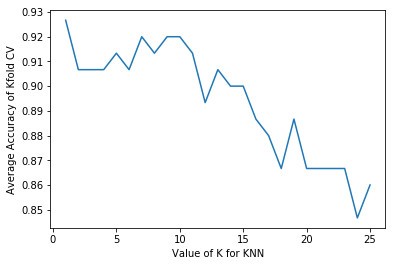

In [51]:
import matplotlib.pyplot as plt
plt.plot(k_range,test_accuracy)
plt.xlabel("Value of K for KNN")
plt.ylabel("Average Accuracy of Kfold CV")